In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, \
    precision_score, recall_score, accuracy_score

from math import sqrt

import seaborn as sns

import matplotlib.pyplot as plt

from rdkit import Chem

In [2]:
results = pd.read_csv('predictions_all.csv', usecols=[1,2,3,4,5,6])
results['real_side'] = results['real_top'].apply(lambda m: 1 if m>50 else 0)
results['predicted_side'] = results['predicted_top'].apply(lambda m: 1 if m>50 else 0)
results

,Error,Index,Fold,Method,real_top,predicted_top,real_side,predicted_side
0,0.458312,0,1,GNN,1.0,0.541688,0,0
1,0.744209,1,1,GNN,1.5,0.755791,0,0
2,-1.440615,2,1,GNN,0.5,1.940615,0,0
3,0.139243,3,1,GNN,0.5,0.360757,0,0
4,0.695401,4,1,GNN,1.0,0.304599,0,0
...,...,...,...,...,...,...,...,...
6115,31.716521,29,10,Atomistic Potential,97.0,65.283479,1,1
6116,-25.725271,30,10,Atomistic Potential,1.0,26.725271,0,0
6117,7.862514,31,10,Atomistic Potential,99.5,91.637486,1,1
6118,-28.000286,32,10,Atomistic Potential,2.0,30.000286,0,0


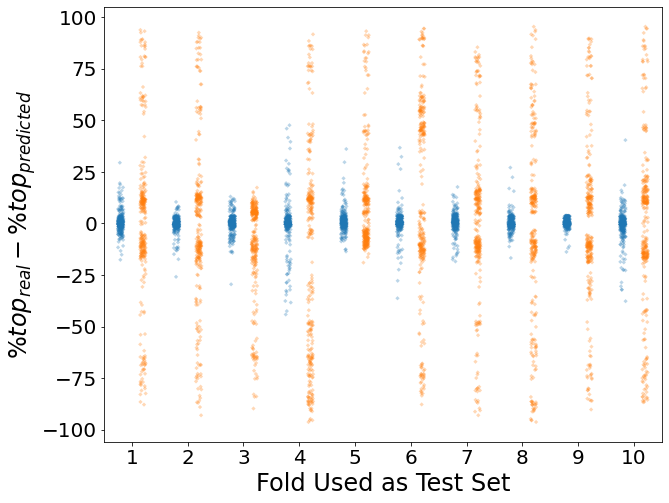

In [3]:
plt.figure(figsize=(10,8))

sns.stripplot(
    data=results, x="Fold", y="Error", hue="Method", size=3, dodge=True, jitter=True, marker='D', alpha=.3)

#plt.xticks(range(1, 11), range(1, 11))


plt.xlabel('Fold Used as Test Set', fontsize=24)
plt.ylabel('$\%top_{real}-\%top_{predicted}$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax= plt.gca()
ax.get_legend().remove()

In [4]:
results_gnn = results.loc[results['Method'] == 'GNN']
results_TML = results.loc[results['Method'] == 'Atomistic Potential']

In [5]:
precision_gnn = precision_score(y_true=results_gnn['real_side'], y_pred=results_gnn['predicted_side'])
recall_gnn = recall_score(y_true=results_gnn['real_side'], y_pred=results_gnn['predicted_side'])
accuracy_gnn = accuracy_score(y_true=results_gnn['real_side'], y_pred=results_gnn['predicted_side'])

print('Precision score all datapoints GNN {}'.format(precision_gnn))
print('Recall score all datapoints GNN {}'.format(recall_gnn))
print('Accuracy score all datapoints GNN {}'.format(accuracy_gnn))

Precision score all datapoints GNN 1.0
Recall score all datapoints GNN 1.0
Accuracy score all datapoints GNN 1.0


In [6]:
precision_tml = precision_score(y_true=results_TML['real_side'], y_pred=results_TML['predicted_side'])
recall_tml = recall_score(y_true=results_TML['real_side'], y_pred=results_TML['predicted_side'])
accuracy_tml = accuracy_score(y_true=results_TML['real_side'], y_pred=results_TML['predicted_side'])

print('Precision score all datapoints TML {}'.format(precision_tml))
print('Recall score all datapoints TML {}'.format(recall_tml))
print('Accuracy score all datapoints TML {}'.format(accuracy_tml))

Precision score all datapoints TML 0.7391304347826086
Recall score all datapoints TML 0.7777777777777778
Accuracy score all datapoints TML 0.7516339869281046


In [7]:
mae_gnn = mean_absolute_error(y_true=results_gnn['real_top'], y_pred=results_gnn['predicted_top'])
rmse_gnn = sqrt(mean_squared_error(y_true=results_gnn['real_top'], y_pred=results_gnn['predicted_top']))
r2_gnn = r2_score(y_true=results_gnn['real_top'], y_pred=results_gnn['predicted_top'])

print('Mean absolute error all datapoints GNN {}'.format(mae_gnn))
print('Root mean squared error  all datapoints GNN {}'.format(rmse_gnn))
print('R2 score all datapoints GNN {}'.format(r2_gnn))

Mean absolute error all datapoints GNN 3.1396643496005603
Root mean squared error  all datapoints GNN 5.9118229051367255
R2 score all datapoints GNN 0.9852992874851012


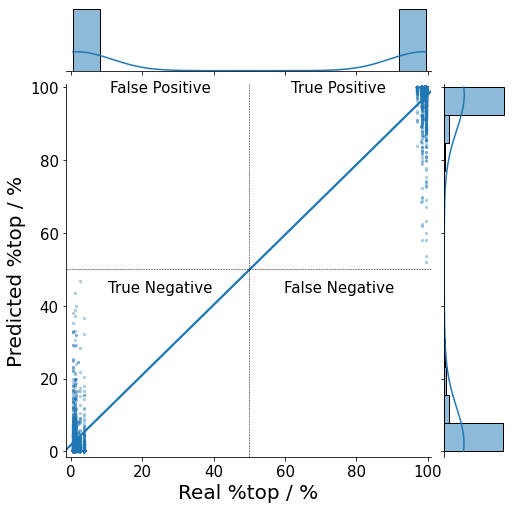

In [8]:
g = sns.jointplot(x="real_top", y="predicted_top", data=results_gnn,
                  kind="reg", truncate=False,
                  xlim=(-1.5, 101), ylim=(-1.5, 101),
                  color="#1f77b4", height=7,
                  scatter_kws={"s": 5, "alpha": 0.3})



plt.axvline(x=50, color='black', linestyle='--', linewidth=.5)

# add horizontal line at y=50
plt.axhline(y=50, color='black', linestyle='--', linewidth=.5)


# plot your data here
'''plt.text(x=25, y=80, s=f"$R^2$ = {r2_gnn:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=25, y=75, s=f"MAE = {mae_gnn:.2f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=25, y=70, s=f"RMSE = {rmse_gnn:.2f}", fontsize=15, horizontalalignment='center', verticalalignment='center')

plt.text(x=75, y=20, s=f"Accuracy = {accuracy_gnn:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=75, y=15, s=f"Recall = {recall_gnn:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=75, y=10, s=f"Precision = {precision_gnn:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')

'''


plt.text(x=25, y=100, s=f"False Positive", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')
plt.text(x=75, y=100, s=f"True Positive", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')

plt.text(x=25, y=45, s=f"True Negative", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')
plt.text(x=75, y=45, s=f"False Negative", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')


g.ax_joint.xaxis.label.set_size(20)
g.ax_joint.yaxis.label.set_size(20)

g.ax_joint.set_xlabel('Real %top / %')
g.ax_joint.set_ylabel('Predicted %top / %')

g.ax_joint.tick_params(axis='both', which='major', labelsize=15)

In [9]:
mae_tml = mean_absolute_error(y_true=results_TML['real_top'], y_pred=results_TML['predicted_top'])
rmse_tml = sqrt(mean_squared_error(y_true=results_TML['real_top'], y_pred=results_TML['predicted_top']))
r2_tml = r2_score(y_true=results_TML['real_top'], y_pred=results_TML['predicted_top'])

print('Mean absolute error all datapoints GNN {}'.format(mae_tml))
print('Root mean squared error  all datapoints GNN {}'.format(rmse_tml))
print('R2 score all datapoints GNN {}'.format(r2_tml))

Mean absolute error all datapoints GNN 29.1409344790549
Root mean squared error  all datapoints GNN 39.72628979724042
R2 score all datapoints GNN 0.3361781156620658


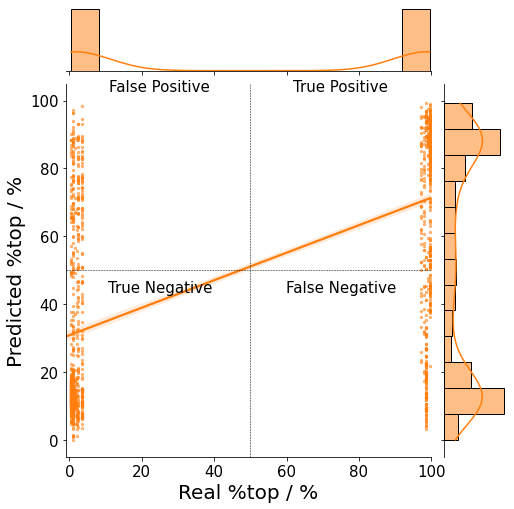

In [10]:
g = sns.jointplot(x="real_top", y="predicted_top", data=results_TML,
                  kind="reg", truncate=False,
                  xlim=(-1, 100), ylim=(-5, 105),
                  color="#ff7f0e", height=7,
                  scatter_kws={"s": 5, "alpha": 0.3})


'''sns.kdeplot(
    data=results_TML,
    x="real_top",
    y="predicted_top",
    thresh=.2,
    color="#ff7f0e"
)'''



plt.axvline(x=50, color='black', linestyle='--', linewidth=.5)
# add horizontal line at y=50
plt.axhline(y=50, color='black', linestyle='--', linewidth=.5)


# plot your data here
'''plt.text(x=25, y=80, s=f"$R^2$ = {r2_tml:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=25, y=75, s=f"MAE = {mae_tml:.2f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=25, y=70, s=f"RMSE = {rmse_tml:.2f}", fontsize=15, horizontalalignment='center', verticalalignment='center')

plt.text(x=75, y=20, s=f"Accuracy = {accuracy_tml:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=75, y=15, s=f"Recall = {recall_tml:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.text(x=75, y=10, s=f"Precision = {precision_tml:.3f}", fontsize=15, horizontalalignment='center', verticalalignment='center')
'''

plt.text(x=25, y=104, s=f"False Positive", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')
plt.text(x=75, y=104, s=f"True Positive", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')


plt.text(x=25, y=45, s=f"True Negative", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')

plt.text(x=75, y=45, s=f"False Negative", fontsize=15, horizontalalignment='center', verticalalignment='center', color='black')

g.ax_joint.xaxis.label.set_size(20)
g.ax_joint.yaxis.label.set_size(20)

g.ax_joint.set_xlabel('Real %top / %')
g.ax_joint.set_ylabel('Predicted %top / %')

g.ax_joint.tick_params(axis='both', which='major', labelsize=15)